In [ ]:
import requests


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
url = "https://www.gutenberg.org/cache/epub/58221/pg58221-images.html"

In [ ]:
contenido = requests.get(url).text

In [ ]:
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
h1 = soup.find("h1")

In [ ]:
print(h1)

<h1 class="g1 ws1">LA ODISEA</h1>


In [ ]:
print(h1.text)

LA ODISEA


In [ ]:
h2 = soup.find_all("h2")

In [ ]:
print(h2)

[<h2 id="pg-header-heading" title="">The Project Gutenberg eBook of <span id="pg-title-no-subtitle" lang="es">La Odisea</span></h2>, <h2 class="nobreak">AL LECTOR</h2>, <h2 class="nobreak g1 ws1">CANTO PRIMERO</h2>, <h2 class="nobreak g1 ws1">CANTO II</h2>, <h2 class="nobreak g1 ws1">CANTO III</h2>, <h2 class="nobreak g1 ws1">CANTO IV</h2>, <h2 class="nobreak g1 ws1">CANTO V</h2>, <h2 class="nobreak g1 ws1">CANTO VI</h2>, <h2 class="nobreak g1 ws1">CANTO VII</h2>, <h2 class="nobreak g1 ws1">CANTO VIII</h2>, <h2 class="nobreak g1 ws1">CANTO IX</h2>, <h2 class="nobreak g1 ws1">CANTO X</h2>, <h2 class="nobreak g1 ws1">CANTO XI</h2>, <h2 class="nobreak g1 ws1">CANTO XII</h2>, <h2 class="nobreak g1 ws1">CANTO XIII</h2>, <h2 class="nobreak g1 ws1">CANTO XIV</h2>, <h2 class="nobreak g1 ws1">CANTO XV</h2>, <h2 class="nobreak g1 ws1">CANTO XVI</h2>, <h2 class="nobreak g1 ws1">CANTO XVII</h2>, <h2 class="nobreak g1 ws1">CANTO XVIII</h2>, <h2 class="nobreak g1 ws1">CANTO XIX</h2>, <h2 class="nobr

In [ ]:
from collections import Counter

In [ ]:
parrafos = str(soup.find_all("p"))

In [ ]:
print(parrafos.count("Ulises"))

1662


In [ ]:
# Funcion para buscar palabras

def buscar_palabra (palabra) :
  conteo = str (soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {conteo} veces")



In [ ]:
buscar_palabra ("Dioses")

Encontraste la palabra 'Dioses' 302 veces


In [ ]:
import random

In [ ]:
parrafo = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafo).text.strip() #Buscar que hace esta funcion

In [ ]:
print(parrafo_aleatorio)

Lemnos (Λῆμνος): Isla del mar Egeo.
Vulcano finge que se va á Lemnos, la ciudad que le es más grata, para
volverse en seguida y sorprender á Marte y Venus en flagrante adulterio,
VIII, 282 á 284.


In [ ]:
print (len(parrafo_aleatorio.split())) #Buscar que hace

37


In [ ]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords #natural language toolkit ##las stopwords son palabras que no aportan al texto onda la, lo, etc entonces no tiene en cuenta esas palabras al momento de analizar
import  re #expresiones regulares, busca patrones (https://www.w3schools.com/python/python_regex.asp)
import matplotlib.pyplot as plt


In [ ]:
#Descarga corpus de stopwords en español
nltk.download('stopwords')
stopwords_es = set (stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Comenzando a tokenizar de manera muy basica
def limpiar_texto(texto):
  texto_minuscula = texto.lower() #convvierrte texto a minuscula
  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # elimina los signos de puntuacion
  lista_palabras = texto_sin_puntuacion.split() #divide texto en palabras individuales
  palabras_importantes = []   #crea lista de palabras importantes

  for palabra in lista_palabras :
    if palabra not in stopwords_es :
      palabras_importantes.append(palabra) #este for in me dice que si la palabra no pertenece a la clasificacion stopword entonces es una palabra importante
#append agrega a la lista
  return palabras_importantes




In [ ]:
texto_completo = soup.get_text()



In [ ]:
palabras_limpias = limpiar_texto(texto_completo) #limpiamos el texto con la funcion q acabo de crear

In [ ]:
palabras_limpias = limpiar_texto (texto_completo)



In [ ]:
texto_limpio = ' '.join(palabras_limpias) #vuelve a unir las palabras q habiamos separado para analizar

In [ ]:
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(texto_limpio)


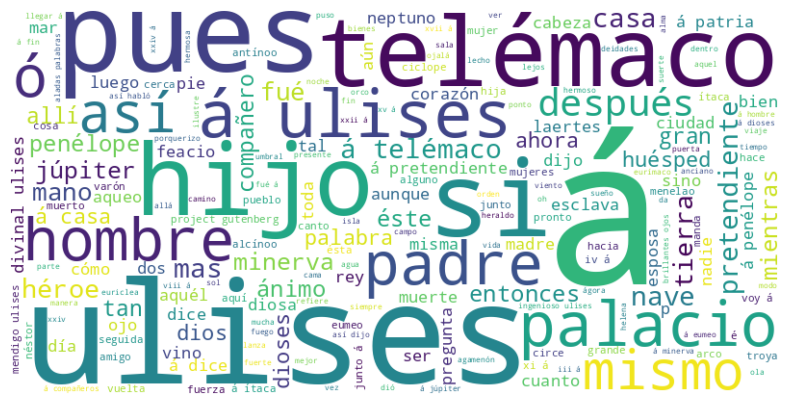

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(texto_limpio)

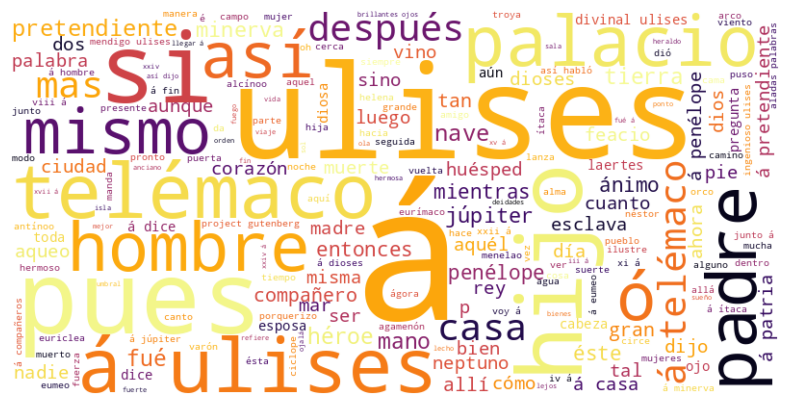

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.colors as mcolors

# Define tu lista de colores
mis_colores = ['#FFC0CB', '#DDA0DD', '#B0E0E6']  # pink, plum, powderblue

# Crea una paleta de colores personalizada
cmap = mcolors.ListedColormap(mis_colores)

# Crea la WordCloud con la paleta personalizada
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cmap).generate(texto_limpio)

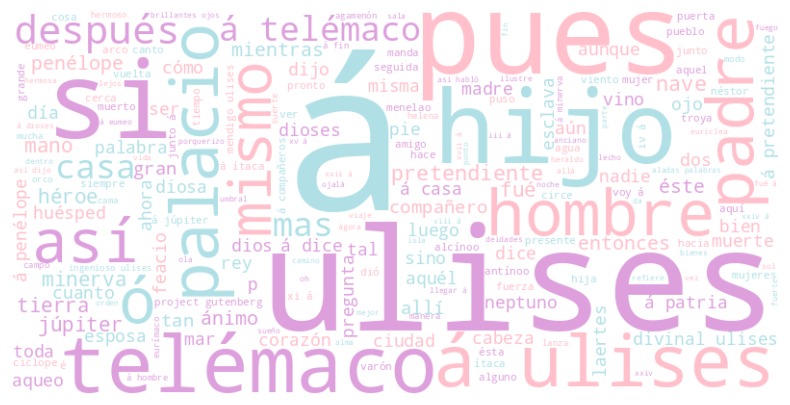

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def limpiar_texto(texto):

#agrego manualmente palabras que quiero q me elimine del texto, las puedo tener en un .txt
 palabras_a_eliminar = ['dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á' , 'ó' , 'si', 'fué', 'aquí', 'allí' , 'é' , 'aún' , 'demás' , 'aquel', 'project gutenberg' ]

#une las nuevas palabras a eliminar a las stopword q ya teniamos
 black_list = stopwords_es.union(palabras_a_eliminar)


 texto_minuscula = texto.lower() #convvierrte texto a minuscula
 texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # elimina los signos de puntuacion
 lista_palabras = texto_sin_puntuacion.split() #divide texto en palabras individuales
 palabras_importantes = []   #crea lista de palabras importantes

 for palabra in lista_palabras :
    if palabra not in black_list :
      palabras_importantes.append(palabra) #este for in me dice que si la palabra no pertenece a la clasificacion stopword entonces es una palabra importante
#append agrega a la lista
 return palabras_importantes

In [ ]:
texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias) #vuelve a unir las palabras q habiamos separado para analizar

In [ ]:
#cambio color del fondo y paleta de colores
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='magma').generate(texto_limpio)

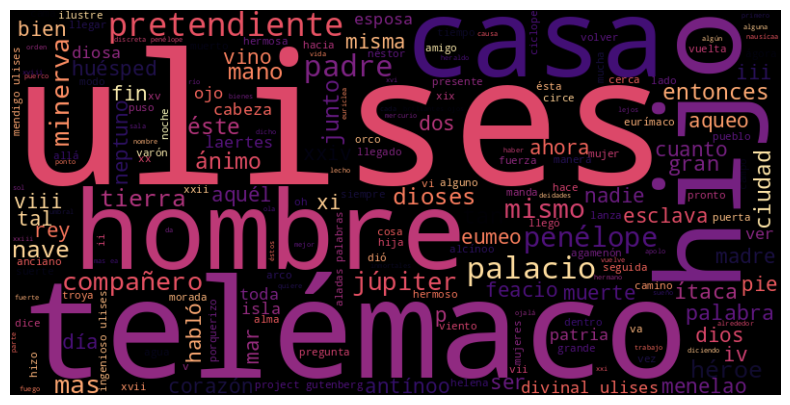

In [ ]:
plt.figure(figsize=(20,5)) #tamaño en x e y
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#ahora con mis colores

# Define tu lista de colores
mis_colores = ['#FFC0CB', '#DDA0DD', '#B0E0E6']  # pink, plum, powderblue

# Crea una paleta de colores personalizada
cmap = mcolors.ListedColormap(mis_colores)

# Crea la WordCloud con la paleta personalizada
wordcloud = WordCloud(width=600, height=300, background_color='black', colormap=cmap).generate(texto_limpio)

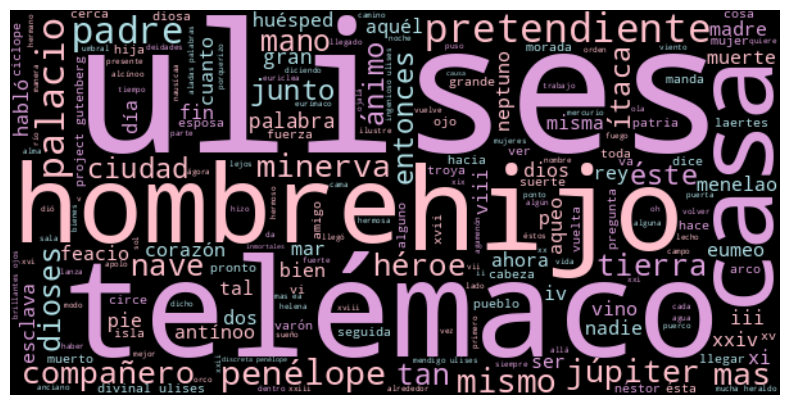

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#tarea: agragar linea que guarde el plot en jpg, con ayuda del asistente

In [ ]:
wordcloud.to_file("wordcloud.jpg") #Gemini

In [ ]:
plt.savefig('grafico.jpg', format='jpg') #ChatGPT


<Figure size 640x480 with 0 Axes>

_____________________________________________________________________________

In [ ]:
url2 = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"
#defino la url

In [ ]:
pagina = requests.get(url2) #lo convierto en texto

In [ ]:
contenido = pagina.text #defino que ese texto es el contenido

In [ ]:
soup = BeautifulSoup(contenido, "html.parser") #creo el objeto soup

In [ ]:
pregunta = soup.find ("div" , {"class" :"question"})
texto_pregunta = pregunta.find ("div" , {"class" :"s-prose js-post-body"})

In [ ]:
print(texto_pregunta.get_text().strip())

How do I get the current time in Python?



---

